# Random Survival Forest

Customer churn/attrition, a.k.a the percentage of customers that stop using paying 
services,
is one of the most important metrics for a business, as it usually costs more to acquire new customers than it does to retain existing ones. Indeed, according to a study by Bain & Company, existing customers tend to buy more from a company over time, thus reducing the operating costs of the business and may refer the products they use to others. For example, in financial services, a 5% increase in customer retention produces more than a 25% increase in profit. By using Survival Analysis, not only companies can predict if customers are likely to stop doing business but also when that event might happen.

## Methods

In this study, we adopt random survival forests which have never been used in understanding 
factors affecting membership in a sport club using existing data in a Sport Club. 
The analysis is based on the use of random survival forests in the presence of covariates 
that do not necessarily satisfy the PH assumption. 
Random Survival Forests does not make the proportional hazards assumption (Ehrlinger, 2016) 
and has the flexibility to model survivor curves that are of dissimilar shapes for 
contrastinggroups of subjects. Random Survival Forest is an extension of Random Forest 
allowing efficient non-parametric analysis of time to event data (Breiman, 2001). 
This characteristcs allow us to surpass the Cox Regression limitation of the proportional hazard
assumption, requiring to exclude variables which not fullfill the model assumption. 
It was shown by (Breiman, 2001) that ensemble learning can be further improved by injecting 
randomization into the base learning process - a method called Random Forests.  
The random survival forest was developed using the package PySurvival (Fotso & Others, 2019)
The most relevant variables predicting the dropout are analysed using the log-rank test. 
The metric variables are transformed to categorical using the quartiles to provide a statistical
comparison of groups. 
The survival analysis was conducted using the package Lifelines (Davidson-Pilon et al., 2017).

## Results
The initial model has a c-index of 0.92. After removing estadoCivil_outro and ano c-index improved to 0.94. Without idade improved to 0.95. 
The most relevant variables predicting the dropout are:
- mesesUP
- valorTotal
- anoUltimoPagamento
- quotaMensal
- escaloesTotalJogos_ate 1
- jogosEpoca
- escaloesTotalJogos_56 a 105
- estadoCivil_solteiro
- escaloesTotalJogos_21 a 56
- escaloesTotalJogos_mais 105
- sexo_M
- estadoCivil_nao definido



TODO: COLOCAR ESTA DESCRIÇÃO PARA TODAS AS VARIÁVEIS:
There were identified significative differences between the gender groups (χ2=194.63, p < .005), wrenew two or more contracts, the survival probability for 12 months is 85.49%

## Methods bibliography
- Ehrlinger, J. (2016). ggRandomForests: Exploring Random Forest Survival. ArXiv:1612.08974 [Stat]. http://arxiv.org/abs/1612.08974
- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32. https://doi.org/10/d8zjwq
- Fotso, S., & others. (2019). PySurvival: Open source package for Survival Analysis modeling. https://www.pysurvival.io/

# Dataset
Considering the sport club policies all the customers with payments less than 24 months where considered active:  
- dt['abandonou'] = 0
- dt.loc[dt['mesesUP']>=24,'abandonou']=1

The variables extracted from the software correspond to the time interval of becoming a customer until the end of observation (censoring on 31 Maio 2019) or the end of the customer relationship (dropout). The survival time in the dataset is represented by the number of years the customer begin affilated.

We extracted records of 25316 customers (male n=17246, female n=8070) from a sport club; data corresponded to the time period between October 1, 1944 and May 31, 2019. 

In [2]:
from IPython.display import HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

df = pd.read_excel('../data/membershipData.xlsx',index_col=0)

# Check file

In [3]:
df.columns

Index(['dataAdesao', 'ano', 'dataNascimento', 'idade', 'sexo', 'estadoCivil',
       'categoria', 'quotaMensal', 'profissao', 'codPostal', 'ultimaQuota',
       'ultimoPagamento', 'valorTotal', 'totalJogos', 'jogosEpoca',
       'diasUltimoPagamento', 'mesesUP', 'abandonou', 'anosSocio',
       'idaEstadio', 'escaloesTotalJogos', 'mes'],
      dtype='object')

In [4]:
df.columns = ['dtInscription','year','birthDate','age','sex','maritalStatus',
             'category','monthlyFee','occupation','zipCode','dtLastInvoice','dtLastPayment','totalAmount',
             'totalMatches','seasonMatches','daysSinceLastPayment','monthsSinceLastPayment','dropout',
             'yearsMembership','stadiumAccess','quartStadiumEntries','inscriptionMonth']

## Description

Variables:

- 'dtInscription': Inscription Date
- 'inscriptionYear': Inscription year
- 'birthDate': Birth date of the member
- 'age': age in years
- 'sex': male or female 
- 'maritalStatus': single, undefined, married, other
- 'category': student, male, female, under_14, athlete, retired, other
- 'monthlyFee': value of the monthly fee in euros (1€, 2.5€, 5€, 6€, 10€)
- 'occupation': student, retired, businessman, teacher, ... 
- 'zipCode': Zip Code
- 'dtLastInvoice': Last invoice date
- 'dtLastPayment': Last payment date
- 'totalAmount': sum of invoice values
- 'totalMatches': number of matches attended in the stadium
- 'seasonMatches': number of matches attended in the current season
- 'daysSinceLastPayment': number of days since the last payment
- 'monthsSinceLastPayment': number of months since the last payment
- 'dropout': dropout yes (1) no (0) - censured data
- 'yearsMembership': number of years membership
- 'stadiumAccess': the member go to the stadium: yes (1) and no (0)
- 'quartStadiumEntries': quartiles number of access to the stadium
- 'inscriptionMonth': inscription month


Ei is the event indicator such that Ei=1, if an event happens and Ei=0 in case of censoring

As variáveis categóricas foram transformadas em dummies:
- sexo
- estadoCivil
- escaloesTotalJogos


In [5]:
df.sex.value_counts()

M    17246
F     8070
Name: sex, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,25316.0,2007.048033,10.937818,1944.0,2004.000000,2010.000000,2014.00000,2019.000000
age,25316.0,27.262996,20.087078,-70.0,13.000000,19.000000,41.00000,118.000000
monthlyFee,25316.0,4.356099,3.550837,0.0,1.000000,2.500000,6.00000,10.000000
totalAmount,25316.0,316.037984,493.971528,0.0,5.000000,53.000000,448.25000,2602.000000
totalMatches,25316.0,26.535946,45.812996,0.0,0.000000,0.000000,36.00000,197.000000
seasonMatches,25316.0,2.171631,4.076356,0.0,0.000000,0.000000,2.00000,16.000000
daysSinceLastPayment,25316.0,586.277033,990.398069,0.0,83.994934,122.113031,534.98242,4778.034828
monthsSinceLastPayment,25316.0,18.814110,32.498248,0.0,2.000000,4.000000,17.00000,156.000000
dropout,25316.0,0.221638,0.415357,0.0,0.000000,0.000000,0.00000,1.000000
yearsMembership,25316.0,11.264339,10.908777,0.0,5.000000,8.000000,14.00000,74.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 1 to 25316
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dtInscription           25316 non-null  datetime64[ns]
 1   year                    25316 non-null  int64         
 2   birthDate               25316 non-null  object        
 3   age                     25316 non-null  int64         
 4   sex                     25316 non-null  object        
 5   maritalStatus           25316 non-null  object        
 6   category                25316 non-null  object        
 7   monthlyFee              25316 non-null  float64       
 8   occupation              25316 non-null  object        
 9   zipCode                 25316 non-null  object        
 10  dtLastInvoice           25316 non-null  object        
 11  dtLastPayment           25316 non-null  object        
 12  totalAmount             25316 non-null  float6

In [8]:
df.head().T

Sócio,1,2,3,4,5
dtInscription,1944-10-01 00:00:00,1944-10-01 00:00:00,1945-08-24 00:00:00,1945-09-01 00:00:00,1945-09-01 00:00:00
year,1944,1944,1945,1945,1945
birthDate,1935-05-11 00:00:00,1930-09-29 00:00:00,1945-08-24 00:00:00,1921-05-27 00:00:00,1921-03-08 00:00:00
age,83,88,73,97,97
sex,M,M,M,M,M
maritalStatus,casado,solteiro,nao definido,casado,outro
category,homem,homem,homem,reformado,homem
monthlyFee,10.0,10.0,10.0,5.0,10.0
occupation,MEDICO,MEDICO,GERENTE INDUSTRIAL,REFORMADO,REFORMADO
zipCode,4715-196,4715-196,4700 - 699,4740-033,4700-055


In [9]:
df.tail().T

Sócio,25312,25313,25314,25315,25316
dtInscription,2019-02-21 00:00:00,2019-02-21 00:00:00,2019-02-21 00:00:00,2019-02-21 00:00:00,2019-02-21 00:00:00
year,2019,2019,2019,2019,2019
birthDate,2011-04-14 00:00:00,2010-05-26 00:00:00,2016-11-24 00:00:00,2004-06-30 00:00:00,1990-05-23 00:00:00
age,7,8,2,14,28
sex,M,M,M,M,M
maritalStatus,solteiro,solteiro,solteiro,solteiro,solteiro
category,sub14,atleta,sub14,sub14,homem
monthlyFee,1.0,1.0,1.0,1.0,10.0
occupation,0,ESTUDANTE,ESTUDANTE,ESTUDANTE,ADJ. COZINHA
zipCode,4710-411,4715-404,4715 - 586,4715 -028,4700-277


## Convert dateLastPayment to date data type 

In [10]:
df['dtLastPayment'] = pd.to_datetime(df['dtLastPayment'],format='%Y-%m-%d %H:%M', errors='coerce')

In [11]:
df['yearLastPayment']=df['dtLastPayment'].apply(lambda x: x.year)

In [12]:
df.yearLastPayment.unique()

array([2019., 2016., 2018., 2015., 2017., 2014., 2008.,   nan, 2009.,
       2007., 2010., 2011., 2012., 2013., 2006.])

In [13]:
df.yearLastPayment=df.yearLastPayment.fillna(0)

In [14]:
df['yearLastPayment']=df.yearLastPayment.astype(int)

In [15]:
df.columns

Index(['dtInscription', 'year', 'birthDate', 'age', 'sex', 'maritalStatus',
       'category', 'monthlyFee', 'occupation', 'zipCode', 'dtLastInvoice',
       'dtLastPayment', 'totalAmount', 'totalMatches', 'seasonMatches',
       'daysSinceLastPayment', 'monthsSinceLastPayment', 'dropout',
       'yearsMembership', 'stadiumAccess', 'quartStadiumEntries',
       'inscriptionMonth', 'yearLastPayment'],
      dtype='object')

In [16]:
df.drop(columns=['dtInscription','dtLastPayment','birthDate','inscriptionMonth','occupation',
                 'zipCode','category','dtLastInvoice','daysSinceLastPayment'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 1 to 25316
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25316 non-null  int64  
 1   age                     25316 non-null  int64  
 2   sex                     25316 non-null  object 
 3   maritalStatus           25316 non-null  object 
 4   monthlyFee              25316 non-null  float64
 5   totalAmount             25316 non-null  float64
 6   totalMatches            25316 non-null  int64  
 7   seasonMatches           25316 non-null  int64  
 8   monthsSinceLastPayment  25316 non-null  int64  
 9   dropout                 25316 non-null  int64  
 10  yearsMembership         25316 non-null  int64  
 11  stadiumAccess           25316 non-null  int64  
 12  quartStadiumEntries     25316 non-null  object 
 13  yearLastPayment         25316 non-null  int64  
dtypes: float64(2), int64(9), object(3)
mem

In [18]:
df.maritalStatus.value_counts()

solteiro        12065
nao definido     7667
casado           5085
outro             499
Name: maritalStatus, dtype: int64

# Dropout event
Ei (event of interest - Dropout) is the event indicator such that Ei=1, if an event happens and Ei=0 in case of censoring

## Converting from categorical to numerical

There are several categorical features that need to be encoded into one-hot vectors:

   - sex 
   - maritalStatus
   - quartStadiumEntries

In [19]:
dfCurvas = df.copy()
df = pd.get_dummies(df, columns=['sex','maritalStatus','quartStadiumEntries'],drop_first=True)

In [20]:
# Creating the time and event columns
time_column = 'yearsMembership'
event_column = 'dropout'

# Extracting the features
features = np.setdiff1d(df.columns, [time_column, event_column] ).tolist()

## check null values and duplicates

In [21]:
# Checking for null values
N_null = sum(df[features].isnull().sum())
print(f"The raw_dataset contains {N_null} null values") #0 null values

The raw_dataset contains 0 null values


Change this to fstring pyton

In [22]:
# Removing duplicates if there exist
N_dupli = sum(df.duplicated(keep='first'))
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"The raw_dataset contains {N_dupli} duplicates")

# Number of samples in the dataset
N = df.shape[0]

The raw_dataset contains 4928 duplicates


# Exploratory Data Analysis


In [23]:
df.columns

Index(['year', 'age', 'monthlyFee', 'totalAmount', 'totalMatches',
       'seasonMatches', 'monthsSinceLastPayment', 'dropout', 'yearsMembership',
       'stadiumAccess', 'yearLastPayment', 'sex_M',
       'maritalStatus_nao definido', 'maritalStatus_outro',
       'maritalStatus_solteiro', 'quartStadiumEntries_21 a 56',
       'quartStadiumEntries_56 a 105', 'quartStadiumEntries_ate 1',
       'quartStadiumEntries_mais 105'],
      dtype='object')

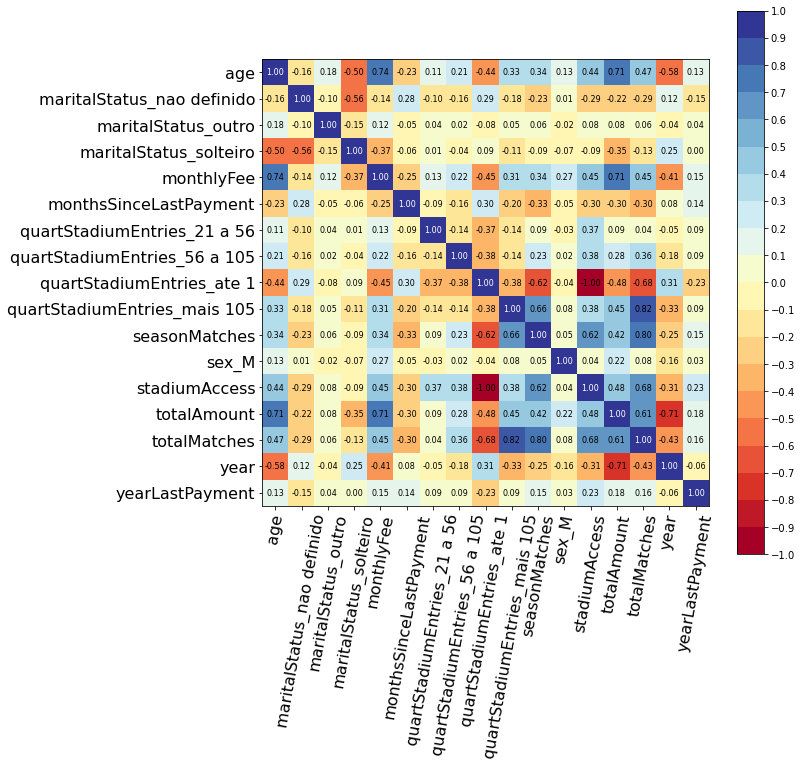

In [24]:
from pysurvival.utils.display import correlation_matrix
correlation_matrix(df[features], figure_size=(10,10), text_fontsize=8)

Vamos remover as variáveis com correlações maiores

In [25]:
#to_remove = ['totalJogos', 'idaEstadio']
#features = np.setdiff1d(features, to_remove).tolist()

# Modeling

So as to perform cross-validation later on and assess the performances of the model, let's split the dataset into training and testing sets.

## Building the model

In [26]:
df_members = df.copy()

In [27]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.spatial.distance import cdist

cluster = KMeans(n_clusters=5)

cluster.fit(df_members)
df_members['cluster']=cluster.predict(df_members)
print(df_members.cluster.value_counts())

0    12395
3     3432
2     2541
1     1051
4      969
Name: cluster, dtype: int64


In [28]:
features

['age',
 'maritalStatus_nao definido',
 'maritalStatus_outro',
 'maritalStatus_solteiro',
 'monthlyFee',
 'monthsSinceLastPayment',
 'quartStadiumEntries_21 a 56',
 'quartStadiumEntries_56 a 105',
 'quartStadiumEntries_ate 1',
 'quartStadiumEntries_mais 105',
 'seasonMatches',
 'sex_M',
 'stadiumAccess',
 'totalAmount',
 'totalMatches',
 'year',
 'yearLastPayment']

In [29]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20388 entries, 0 to 20387
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          20388 non-null  int64  
 1   age                           20388 non-null  int64  
 2   monthlyFee                    20388 non-null  float64
 3   totalAmount                   20388 non-null  float64
 4   totalMatches                  20388 non-null  int64  
 5   seasonMatches                 20388 non-null  int64  
 6   monthsSinceLastPayment        20388 non-null  int64  
 7   dropout                       20388 non-null  int64  
 8   yearsMembership               20388 non-null  int64  
 9   stadiumAccess                 20388 non-null  int64  
 10  yearLastPayment               20388 non-null  int64  
 11  sex_M                         20388 non-null  uint8  
 12  maritalStatus_nao definido    20388 non-null  uint8  
 13  m

In [30]:
cluster

KMeans(n_clusters=5)

# Calculate for all the data

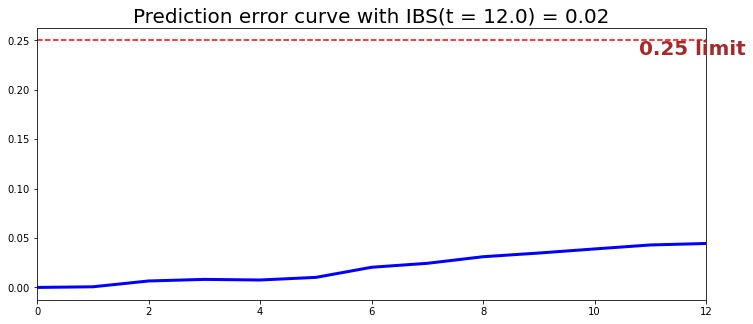

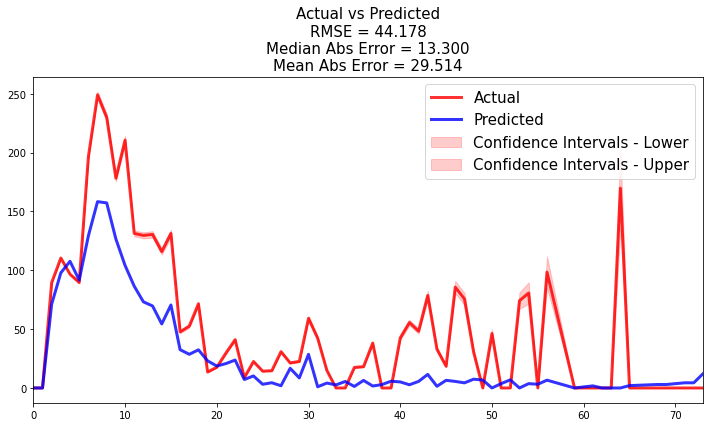

In [31]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from sklearn.model_selection import train_test_split
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.utils.display import compare_to_actual

X = df_members.copy()
t = df_members['yearsMembership']
e = df_members['dropout']
X.drop(axis=1, columns=['yearsMembership','dropout'])

X_train, X_test, t_train, t_test, e_train, e_test = train_test_split(X, t, e, test_size=0.3, random_state=0)

# Fitting the model
csf = RandomSurvivalForestModel(num_trees=200)
csf.fit(X_train, t_train, e_train, max_features='sqrt', max_depth=5, min_node_size=20)

c_index = concordance_index(csf, X_test, t_test, e_test)
ibs = integrated_brier_score(csf, X_test, t_test, e_test, t_max=12, figure_size=(12,5))
results = compare_to_actual(csf, X_test, t_test, e_test, is_at_risk = False,  figure_size=(12, 6), metrics = ['rmse', 'mean', 'median'])

# Calculate the predictions to each cluster

In [32]:
cluster = KMeans(n_clusters=5)

cluster.fit(df_members)
df_members['cluster']=cluster.predict(df_members)
print(df_members.cluster.value_counts())

2    12392
0     3429
3     2547
1     1051
4      969
Name: cluster, dtype: int64


The cluster 4 as a size of 969


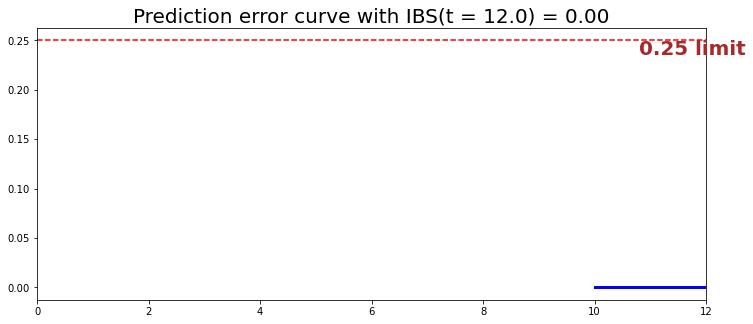

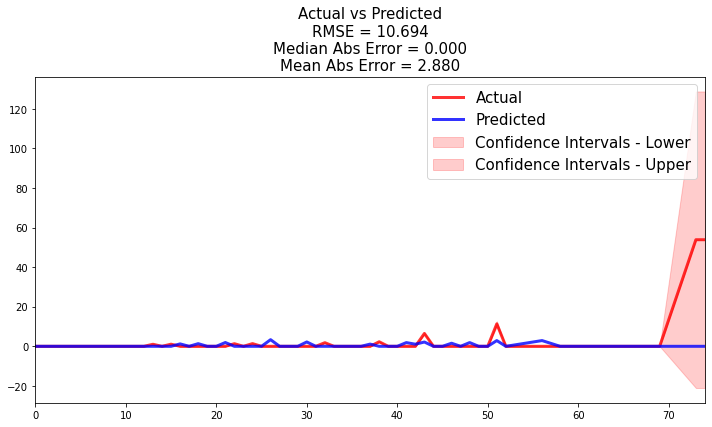

The cluster 0 as a size of 3429


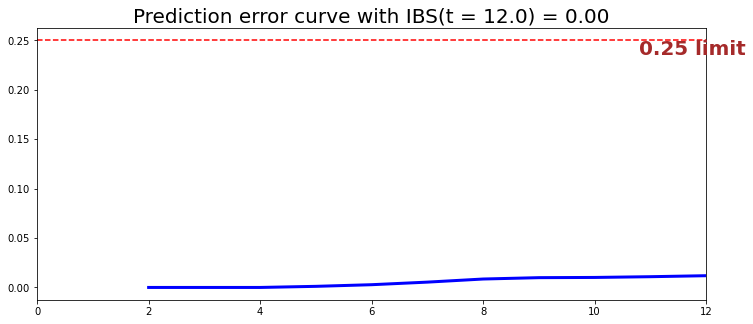

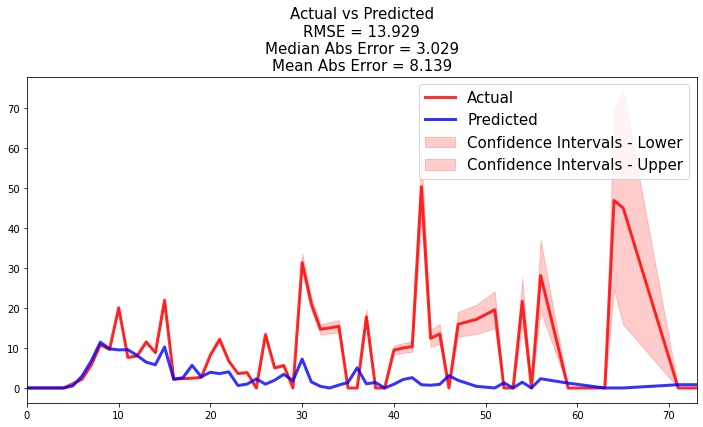

The cluster 3 as a size of 2547


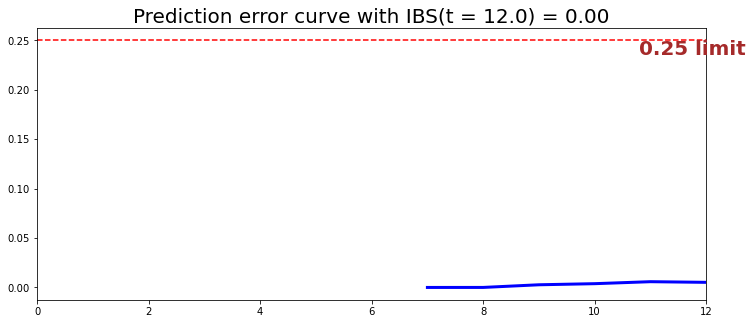

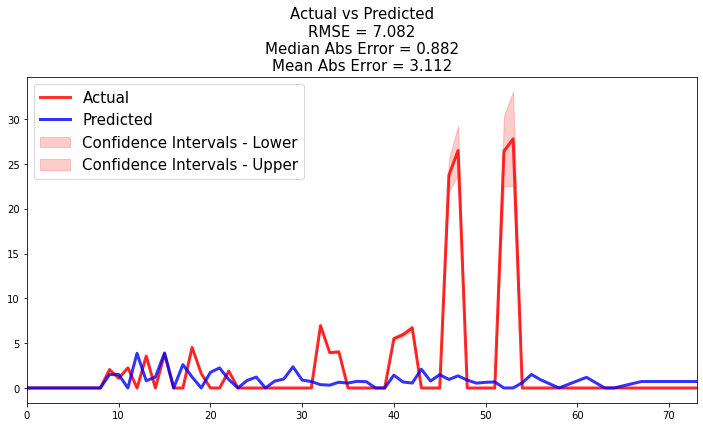

The cluster 2 as a size of 12392


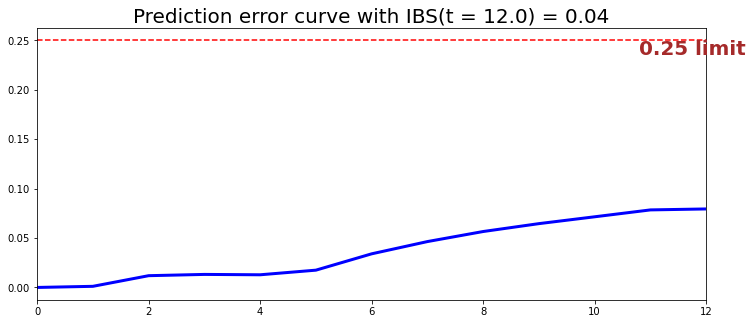

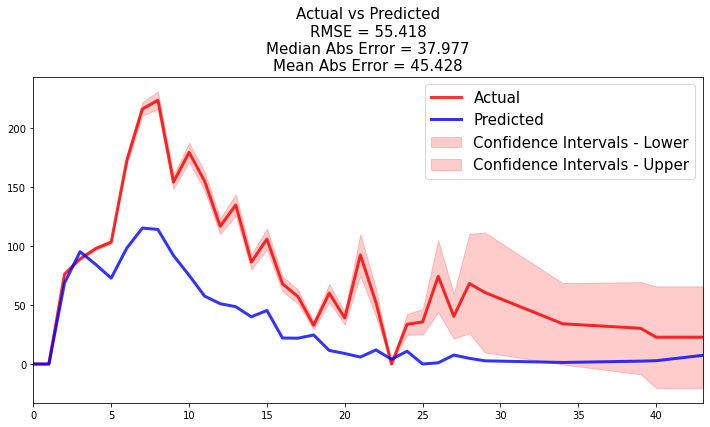

The cluster 1 as a size of 1051


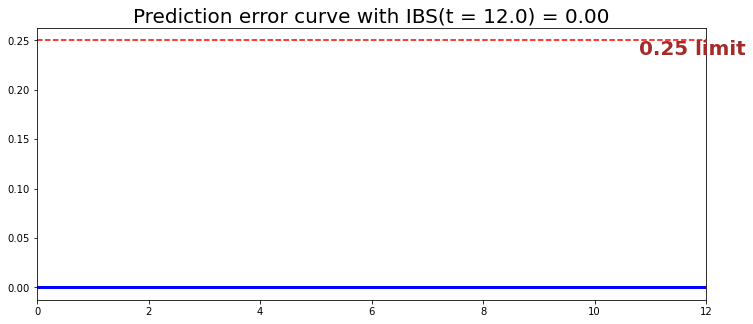

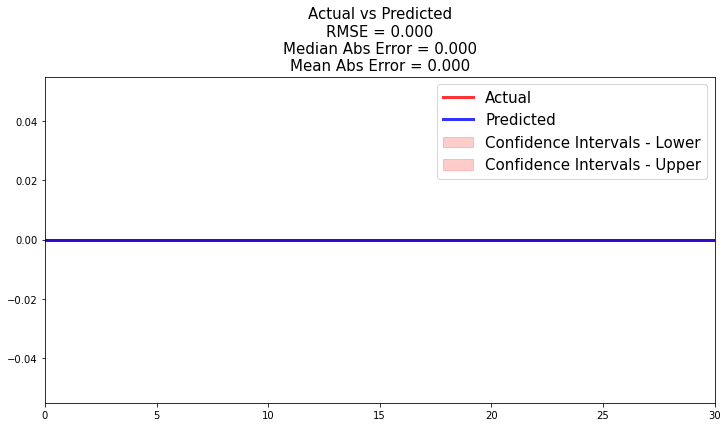

In [33]:
from sklearn.model_selection import train_test_split
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.utils.display import compare_to_actual
from pysurvival.models.survival_forest import RandomSurvivalForestModel

for cluster in df_members.cluster.unique():
    # Number of samples in the dataset
    df_members_cluster = df_members[df_members.cluster == cluster]
    X = df_members_cluster.copy()
    t = df_members_cluster['yearsMembership']
    e = df_members_cluster['dropout']
    X.drop(axis=1, columns=['yearsMembership','dropout'])
    X_train, X_test, t_train, t_test, e_train, e_test = train_test_split(X, t, e, random_state=0)
    print(f"The cluster {cluster} as a size of {X.shape[0]}")
    # Fitting the model
    csf = RandomSurvivalForestModel(num_trees=200)
    csf.fit(X_train, t_train, e_train, max_features='sqrt',
        max_depth=5, min_node_size=20)

    c_index = concordance_index(csf, X_test, t_test, e_test)

    ibs = integrated_brier_score(csf, X_test, t_test, e_test, t_max=12, figure_size=(12,5))

    results = compare_to_actual(csf, X_test, t_test, e_test, is_at_risk = False,  figure_size=(12, 6), metrics = ['rmse', 'mean', 'median'])


### Features importance

In [28]:
csf.variable_importance_table

,feature,importance,pct_importance
0,monthsSinceLastPayment,23.805864,0.352039
1,yearLastPayment,12.062403,0.178378
2,totalAmount,8.509910,0.125844
3,seasonMatches,5.756407,0.085125
4,totalMatches,3.784987,0.055972
5,maritalStatus_solteiro,3.020679,0.044670
6,monthlyFee,2.794168,0.041320
7,maritalStatus_nao definido,2.786578,0.041208
8,sex_M,2.362463,0.034936
9,quartStadiumEntries_56 a 105,1.628022,0.024075


A negative number means that the model performs better without estadoCivil_Outro and ano:
https://stackoverflow.com/questions/27918320/what-does-negative-incmse-in-randomforest-package-mean

The variable monthsSinceLastPayment explains the survival 26.7%%, year last payment 12.%, totalAmount 8%, number of games 5.1%....


### Model performance

We are going to access the model performance using the training and test set. Previously defined.
 C-index close to 1, the model has an powerfull discriminatory; but if it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

### C-index

In [29]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.83

C-index: 0.92


### Brier Score

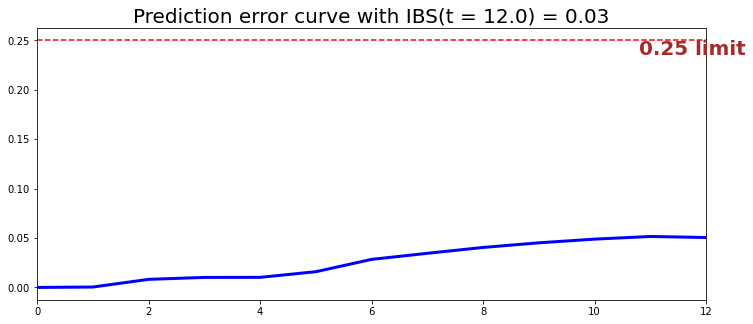

IBS: 0.03


In [30]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(12,5))
print('IBS: {:.2f}'.format(ibs))

The IBS is equal to 0.03 on the entire model time axis. This indicates that the model will have very good predictive abilities.

## Building model without maritalStatus_outro, maritalStatus_nao definido, quartStadiumEntries_mais 105, year

In [31]:
df.columns

Index(['year', 'age', 'monthlyFee', 'totalAmount', 'totalMatches',
       'seasonMatches', 'monthsSinceLastPayment', 'dropout', 'yearsMembership',
       'stadiumAccess', 'yearLastPayment', 'sex_M',
       'maritalStatus_nao definido', 'maritalStatus_outro',
       'maritalStatus_solteiro', 'quartStadiumEntries_21 a 56',
       'quartStadiumEntries_56 a 105', 'quartStadiumEntries_ate 1',
       'quartStadiumEntries_mais 105'],
      dtype='object')

In [32]:
to_remove = ['maritalStatus_outro', 'maritalStatus_nao definido', 'quartStadiumEntries_mais 105', 'year']
features = np.setdiff1d(features, to_remove).tolist()

In [33]:
# Creating the X, T and E inputs
X_train, X_test = df[features], data_test[features]
T_train, T_test = df[time_column], data_test[time_column]
E_train, E_test = df[event_column], data_test[event_column]

In [34]:
csf = RandomSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        max_depth=5, min_node_size=20)

RandomSurvivalForestModel

### Features importance

In [35]:
csf.variable_importance_table

,feature,importance,pct_importance
0,monthsSinceLastPayment,25.406370,0.299536
1,yearLastPayment,12.462683,0.146932
2,totalAmount,10.616251,0.125163
3,totalMatches,7.731164,0.091149
4,monthlyFee,7.325312,0.086364
5,seasonMatches,6.094811,0.071857
6,maritalStatus_solteiro,4.645496,0.054769
7,stadiumAccess,2.888427,0.034054
8,sex_M,2.543165,0.029983
9,quartStadiumEntries_ate 1,2.514027,0.029640


### Model performance

We are going to access the model performance using the training and test set. Previously defined.
 C-index close to 1, the model has an powerfull discriminatory; but if it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

### C-index

In [36]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.83

C-index: 0.95


### Brier Score

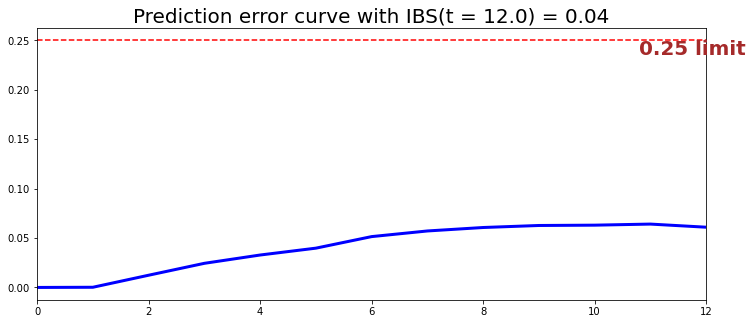

IBS: 0.04


In [37]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=12,
    figure_size=(12,5))
print('IBS: {:.2f}'.format(ibs))

# Predictions
Lets compare the timeseries of actual and predicted customers who leave for each time t.

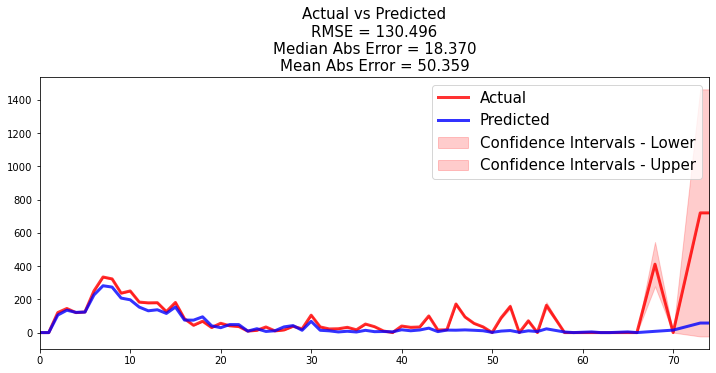

In [38]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(csf, X_test, T_test, E_test, is_at_risk = False,  
figure_size=(12, 5), metrics = ['rmse', 'mean', 'median'])

# Test the prediction accuracy using clusters to improve the accuracy

The model only makes an average absolute error of ~33 customers.

## Individual predictions
Compute the probability of remaining a customer for all times t

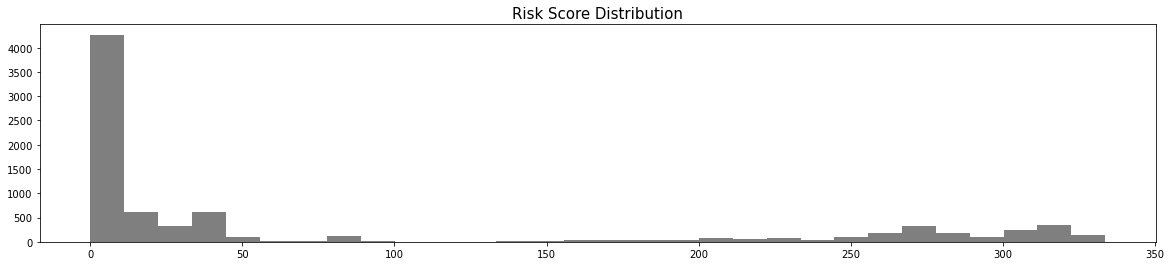

In [39]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=csf, X=X_test,
    use_log = False, num_bins=30, figure_size=(20, 4))

# Survival Curves 

In [40]:
def curvaSobrevivencia(dados,coluna):
    ax = plt.subplot(111)
    plt.rcParams['figure.figsize'] = [12, 5]
    for item in dados[coluna].unique():
        ix = dados[coluna] == item
        kmf.fit(T.loc[ix], C.loc[ix], label=str(item))
        ax = kmf.plot(ax=ax)

## Kaplan-Meier main curve

In [41]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import pairwise_logrank_test

kmf = KaplanMeierFitter()
T = dfCurvas['yearsMembership']
C = dfCurvas['dropout']
kmf.fit(T,C,label="Membership dropout");

In [42]:
tabela=pd.concat([kmf.event_table.reset_index(), 
           kmf.conditional_time_to_event_.reset_index(),
           kmf.survival_function_.reset_index()],axis=1)

In [43]:
tabela.columns = ['event_at', 'removed', 'observed', 'censored', 'entrance', 'at_risk','timeline',
                  'median duration remaining to event','timeline', 'Membership dropout']

In [44]:
tabela.head(12)

,event_at,removed,observed,censored,entrance,at_risk,timeline,median duration remaining to event,timeline,Membership dropout
0,0,1595,0,1595,25316,25316,0.0,48.0,0.0,1.000000
1,1,1809,0,1809,0,23721,1.0,47.0,1.0,1.000000
2,2,1132,261,871,0,21912,2.0,47.0,2.0,0.988089
3,3,1019,318,701,0,20780,3.0,48.0,3.0,0.972968
4,4,630,260,370,0,19761,4.0,47.0,4.0,0.960166
5,5,827,264,563,0,19131,5.0,47.0,5.0,0.946916
6,6,2111,534,1577,0,18304,6.0,48.0,6.0,0.919291
7,7,1988,719,1269,0,16193,7.0,49.0,7.0,0.878473
8,8,1942,652,1290,0,14205,8.0,48.0,8.0,0.838151
9,9,1241,459,782,0,12263,9.0,55.0,9.0,0.806780


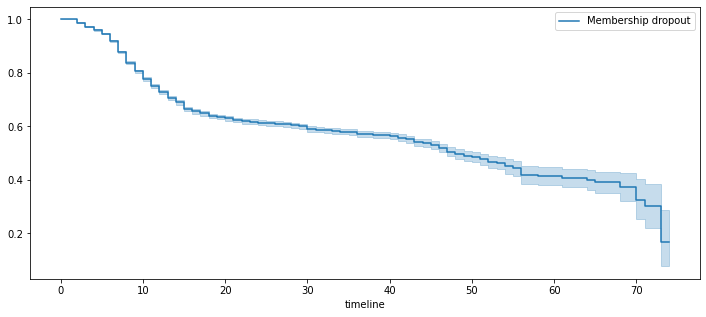

In [45]:
plt.rcParams['figure.figsize'] = [12, 5]

kmf.plot();

## By gender 

M    17246
F     8070
Name: sex, dtype: int64


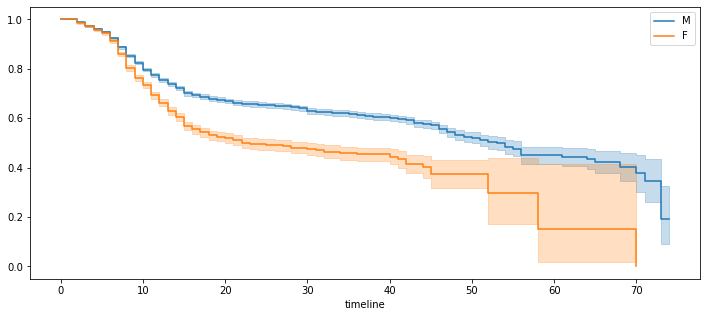

In [46]:
print(dfCurvas.sex.value_counts())
curvaSobrevivencia(dfCurvas,'sex')

In [47]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas.sex,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         194.63 <0.005    144.53

In [48]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas.sex,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
     test_statistic      p  -log2(p)
F M          194.63 <0.005    144.53

## MesesUP

In [49]:
dfCurvas.monthsSinceLastPayment.describe()

count    25316.000000
mean        18.814110
std         32.498248
min          0.000000
25%          2.000000
50%          4.000000
75%         17.000000
max        156.000000
Name: monthsSinceLastPayment, dtype: float64

In [50]:
var='monthsSinceLastPayment'
varEscalao='escMesesUP'
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 2: 
        dfCurvas.at[index,varEscalao]=var+' less than 2'
    elif (cliente[var] > 2) & (cliente[var] <= 4):
        dfCurvas.at[index,varEscalao]=var+' greather than 2 and less 4'
    elif (cliente[var] > 4) & (cliente[var] <= 17):
        dfCurvas.at[index,varEscalao]=var + ' greather than 4 and less 17'
    elif (cliente[var] > 17):
        dfCurvas.at[index,varEscalao]=var + ' greather than 17'

In [51]:
dfCurvas.monthsSinceLastPayment.value_counts()

0      4767
2      4047
3      3557
4      1396
13      834
       ... 
150       6
154       5
149       4
151       4
155       1
Name: monthsSinceLastPayment, Length: 156, dtype: int64

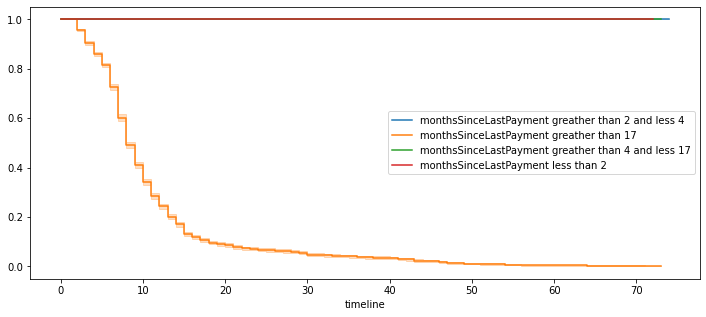

In [52]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [53]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
       19998.90 <0.005       inf

In [54]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                                                                       test_statistic      p  -log2(p)
monthsSinceLastPayment greather than 17            monthsSinceLastPayment greather than 2 and less 4          6442.37 <0.005       inf
                                                   monthsSinceLastPayment greather than 4 and less 17         4353.19 <0.005       inf
                                                   monthsSinceLastPayment less than 2                        10330.89 <0.005       inf
monthsSinceLastPayment greather than 2 and less 4  monthsSinceLastPayment greather than 4 and less 17            0.00   1.00     -0.00
                                                   monthsSinceLastPayment less than 2                            0.00   1.00     -0.00
monthsSinceLastPayment greather than 4 and less 17 monthsSinceLastPayment less than 2                            0.00   1.00     -0.00

## ValorTotal

In [55]:
dfCurvas.totalAmount.describe()

count    25316.000000
mean       316.037984
std        493.971528
min          0.000000
25%          5.000000
50%         53.000000
75%        448.250000
max       2602.000000
Name: totalAmount, dtype: float64

In [56]:
var='totalAmount'
varEscalao='escValorTotal'
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 5: 
        dfCurvas.at[index,varEscalao]=var+' less than 5'
    elif (cliente[var] > 5) & (cliente[var] <= 53):
        dfCurvas.at[index,varEscalao]=var+' greather than 5 and less 53'
    elif (cliente[var] > 53) & (cliente[var] <= 448):
        dfCurvas.at[index,varEscalao]=var + ' greather than 53 and less 448'
    elif (cliente[var] > 448):
        dfCurvas.at[index,varEscalao]=var + ' greather than 448'

In [57]:
dfCurvas[varEscalao].value_counts()

totalAmount less than 5                      7060
totalAmount greather than 448                6329
totalAmount greather than 53 and less 448    6280
totalAmount greather than 5 and less 53      5647
Name: escValorTotal, dtype: int64

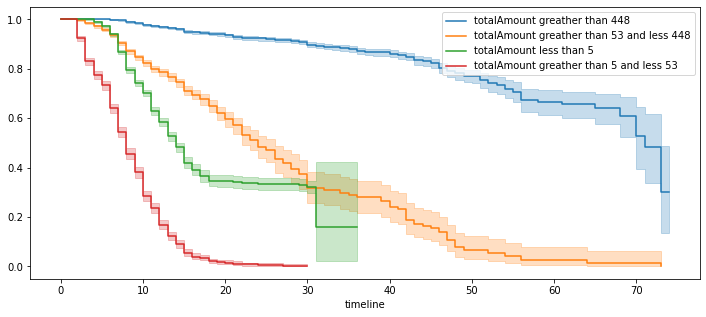

In [58]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [59]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        9517.83 <0.005       inf

In [60]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                                                     test_statistic      p  -log2(p)
totalAmount greather than 448             totalAmount greather than 5 and less 53           8318.46 <0.005       inf
                                          totalAmount greather than 53 and less 448         1527.15 <0.005       inf
                                          totalAmount less than 5                           3177.43 <0.005       inf
totalAmount greather than 5 and less 53   totalAmount greather than 53 and less 448         2997.58 <0.005       inf
                                          totalAmount less than 5                           2005.35 <0.005       inf
totalAmount greather than 53 and less 448 totalAmount less than 5                            274.05 <0.005    202.07

## MonthlyFee

In [61]:
varEscalao='monthlyFee'
dfCurvas[varEscalao].describe()

count    25316.000000
mean         4.356099
std          3.550837
min          0.000000
25%          1.000000
50%          2.500000
75%          6.000000
max         10.000000
Name: monthlyFee, dtype: float64

In [62]:
dfCurvas[varEscalao].value_counts()

1.0     8016
2.5     7168
10.0    6126
6.0     3123
5.0      869
0.0       14
Name: monthlyFee, dtype: int64

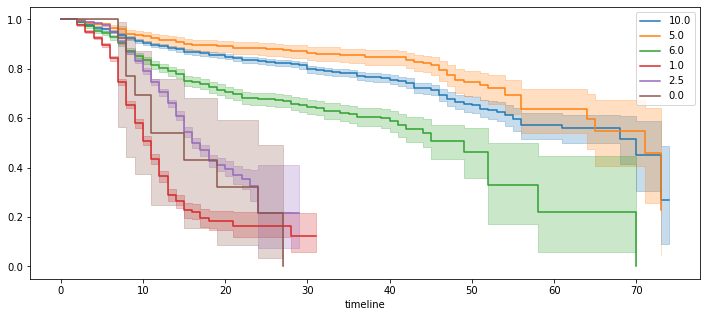

In [63]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [64]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 5
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        3373.68 <0.005       inf

In [65]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
          test_statistic      p  -log2(p)
0.0 1.0             0.84   0.36      1.47
    2.5             0.73   0.39      1.34
    5.0            76.73 <0.005     58.83
    6.0            19.48 <0.005     16.59
    10.0           53.94 <0.005     42.14
1.0 2.5          1031.08 <0.005    749.10
    5.0           653.86 <0.005    476.66
    6.0           846.92 <0.005    616.11
    10.0         2167.78 <0.005       inf
2.5 5.0           340.21 <0.005    249.95
    6.0           178.33 <0.005    132.71
    10.0          957.33 <0.005    695.85
5.0 6.0           109.35 <0.005     82.60
    10.0           16.29 <0.005     14.17
6.0 10.0          159.39 <0.005    118.97

## Season Matches

In [66]:
var='seasonMatches'
varEscalao='escJogosEpoca'
dfCurvas[var].describe()

count    25316.000000
mean         2.171631
std          4.076356
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         16.000000
Name: seasonMatches, dtype: float64

In [67]:
dfCurvas[varEscalao]=''
for index, cliente in dfCurvas.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente[var] <= 2: 
        dfCurvas.at[index,varEscalao]=var+' less than 2'
    elif (cliente[var] > 2):
        dfCurvas.at[index,varEscalao]=var + ' greather than 2'

In [68]:
dfCurvas[varEscalao].value_counts()

seasonMatches less than 2        19015
seasonMatches greather than 2     6301
Name: escJogosEpoca, dtype: int64

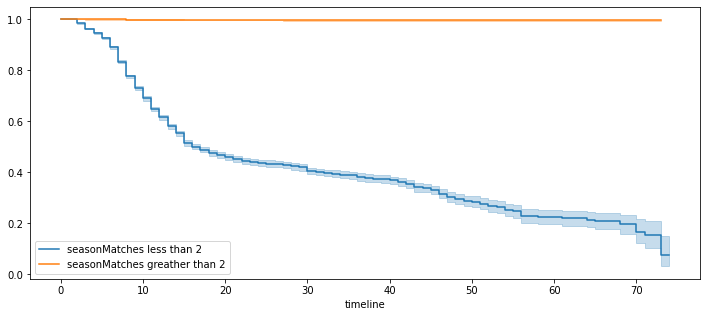

In [69]:
curvaSobrevivencia(dfCurvas,varEscalao)

In [70]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        3270.33 <0.005       inf

In [71]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[varEscalao],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                         test_statistic      p  -log2(p)
seasonMatches greather than 2 seasonMatches less than 2         3270.33 <0.005       inf

## escalaoTotalJogos

In [72]:
var='escJogosEpoca'
dfCurvas[var].describe()

count                         25316
unique                            2
top       seasonMatches less than 2
freq                          19015
Name: escJogosEpoca, dtype: object

In [73]:
dfCurvas[var].value_counts()

seasonMatches less than 2        19015
seasonMatches greather than 2     6301
Name: escJogosEpoca, dtype: int64

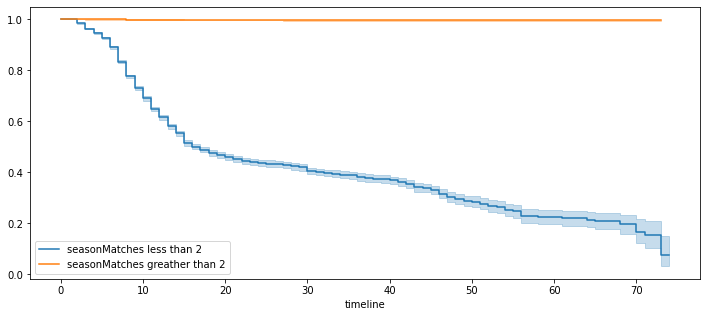

In [74]:
curvaSobrevivencia(dfCurvas,var)

In [75]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        3270.33 <0.005       inf

In [76]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                         test_statistic      p  -log2(p)
seasonMatches greather than 2 seasonMatches less than 2         3270.33 <0.005       inf

##  Marital Status

In [77]:
var='maritalStatus'
dfCurvas[var].describe()

count        25316
unique           4
top       solteiro
freq         12065
Name: maritalStatus, dtype: object

In [78]:
dfCurvas[var].value_counts()

solteiro        12065
nao definido     7667
casado           5085
outro             499
Name: maritalStatus, dtype: int64

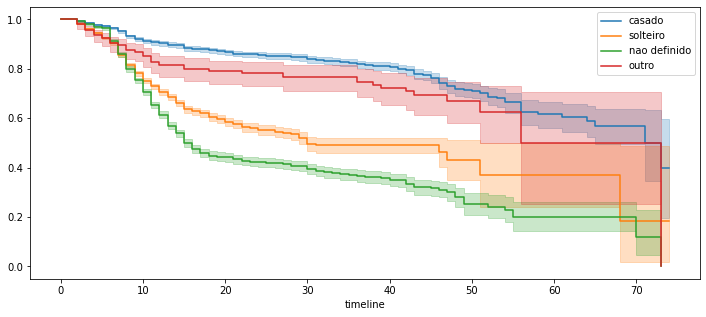

In [79]:
curvaSobrevivencia(dfCurvas,var)

In [80]:
results=multivariate_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1350.15 <0.005    969.05>

In [81]:
results=pairwise_logrank_test(event_durations=T,groups=dfCurvas[var],event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                           test_statistic      p  -log2(p)
casado       nao definido         1387.59 <0.005   1006.48
             outro                  16.82 <0.005     14.57
             solteiro              763.13 <0.005    555.60
nao definido outro                  84.70 <0.005     64.65
             solteiro               86.34 <0.005     65.84
outro        solteiro               35.30 <0.005     28.40

In [82]:
print('teste')

teste
